In [1]:
import matplotlib
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd


In [4]:
# datalabsel_list = ['synthetic_log_b', 'synthetic_log_bc1', 'synthetic_log_bc2', 'synthetic_log_bc1c2', 'bpic17', 'bpic15']
datalabsel_list = ['bpic15']#, 'synthetic_log_bc1']
performance_measure = 'Accuracy'

# classifier = 'htc'
# counter = 200
figure(figsize=(12,4,))



<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

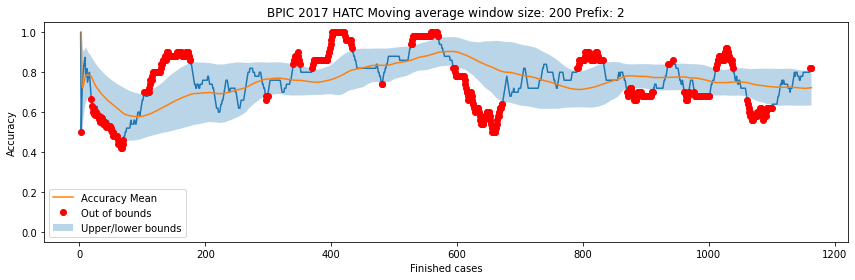

<Figure size 432x288 with 0 Axes>

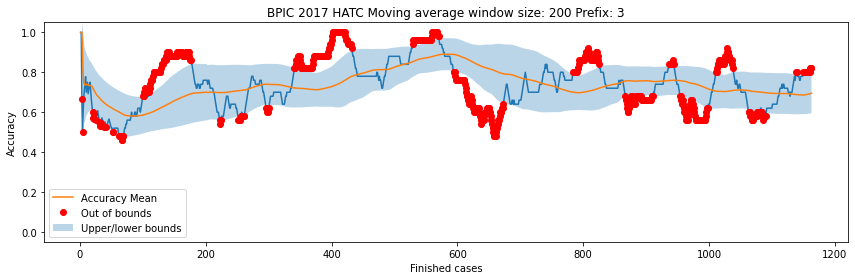

<Figure size 432x288 with 0 Axes>

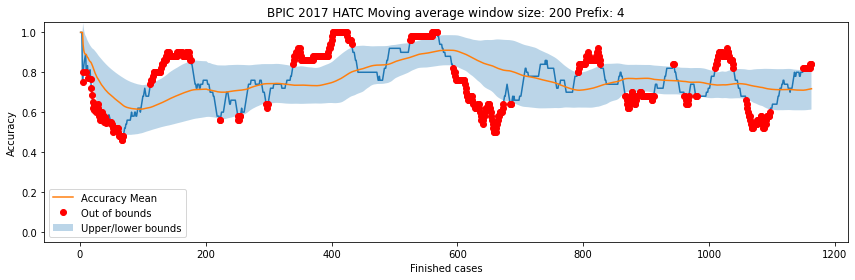

<Figure size 432x288 with 0 Axes>

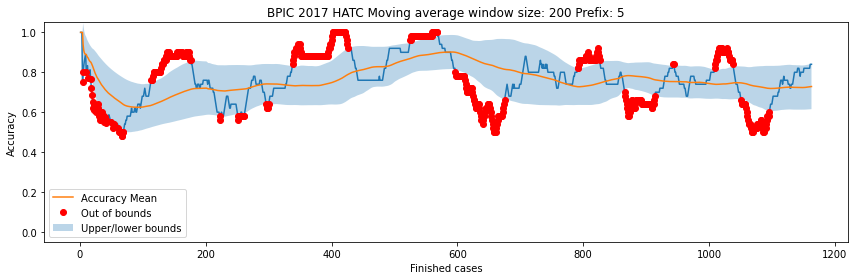

<Figure size 432x288 with 0 Axes>

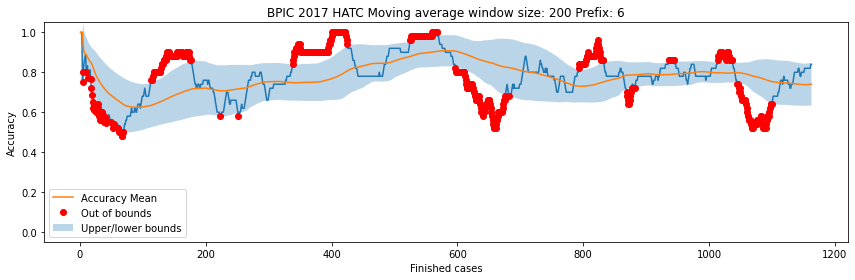

<Figure size 432x288 with 0 Axes>

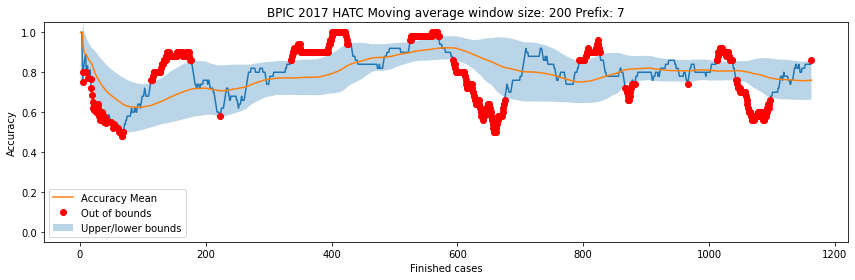

<Figure size 432x288 with 0 Axes>

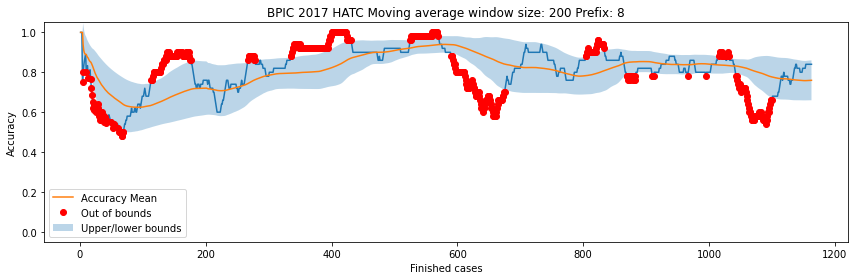

<Figure size 432x288 with 0 Axes>

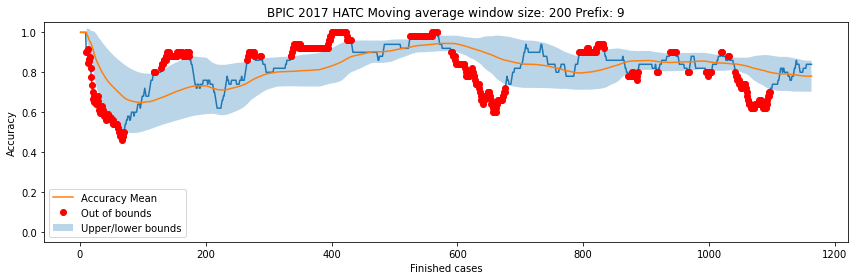

<Figure size 432x288 with 0 Axes>

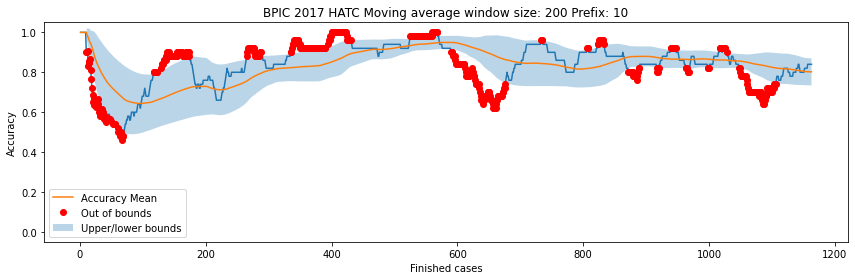

<Figure size 432x288 with 0 Axes>

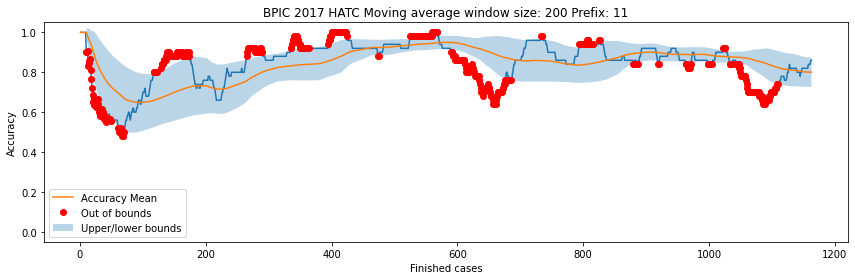

<Figure size 432x288 with 0 Axes>

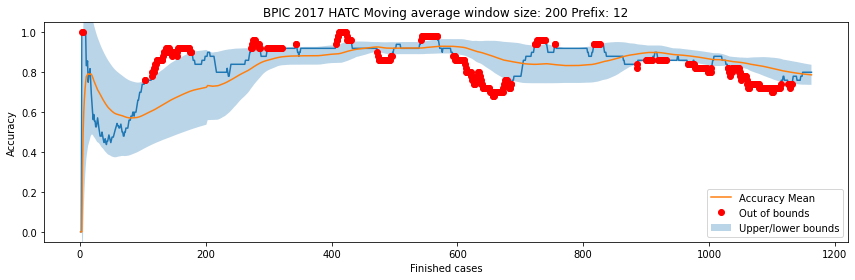

<Figure size 432x288 with 0 Axes>

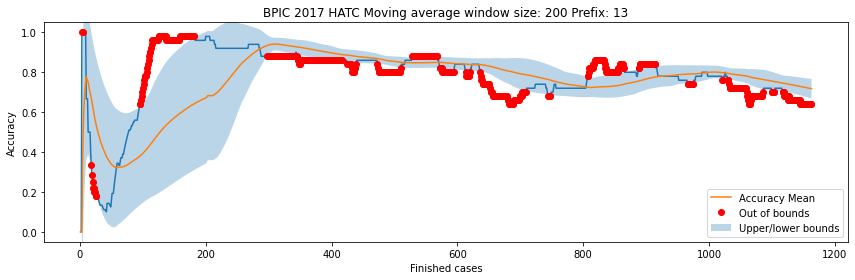

<Figure size 432x288 with 0 Axes>

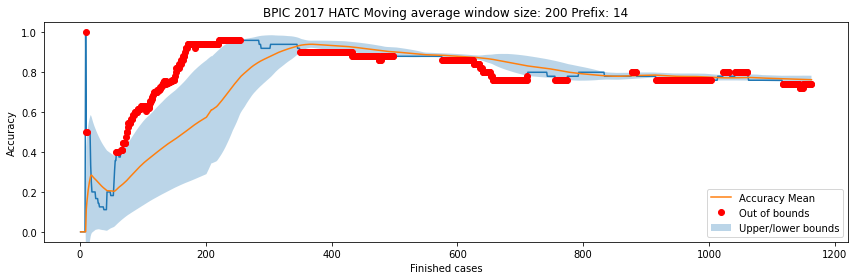

<Figure size 432x288 with 0 Axes>

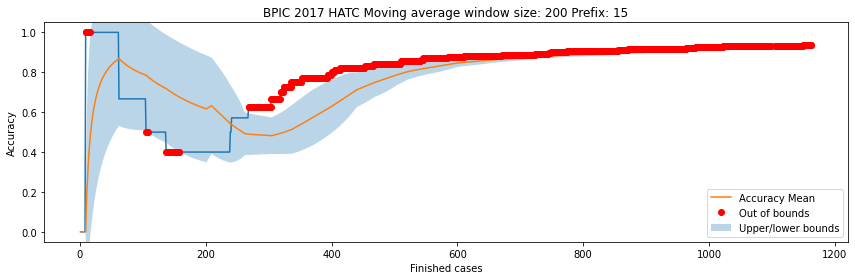

<Figure size 432x288 with 0 Axes>

In [30]:
performance_measure = 'Accuracy'
# datalabsel_list = ['synthetic_log_b', 'synthetic_log_bc1', 'synthetic_log_bc2', 'synthetic_log_bc1c2', 'bpic17', 'bpic15']
datalabsel_list = ['bpic17']#, 'synthetic_log_bc1']


for counter in [200]:
    for classifier in ['hatc']:
        for datalabel in datalabsel_list:

            with open('./dataset_parameters.json','r') as json_file:
                parameters = json.load(json_file)[datalabel]
                maximum_prefix = parameters['maximum_prefix']
            for prefix in range(2, maximum_prefix+1):

                figure(figsize=(12,4,))
    
                df = pd.read_csv('./img/%s/%s/%s/result%s prefix%s.csv'%(datalabel, classifier,performance_measure ,counter, prefix))
                # df50 = pd.read_csv('./result100.csv')
                x_list =[x+1 for x in df.index.values]

                x_outliers = []
                y_outliers = []

                for pos, out in enumerate(list(df['Normality'])):
                    if out == False:
                        x_outliers.append(pos+1)
                        y_outliers.append(list(df['New observation'])[pos])
                plt.plot(x_list, df['New observation'])
                plt.plot(x_list, df['Acc mean'], label='Accuracy Mean')
                plt.fill_between(x_list,df['Acc mean']-df['Acc std'],df['Acc mean']+df['Acc std'],alpha=.3, label = 'Upper/lower bounds')

#                 plt.axvline(x=293, color='grey', linestyle='--', label='Concept drift')
#                 plt.text(x=295, y=0.01, s='293', fontsize= 13)
#                 plt.axvline(x=793, color='grey', linestyle='--')
#                 plt.text(x=795, y=0.01, s='793', fontsize= 13)

                plt.plot(x_outliers, y_outliers, 'ro', label = 'Out of bounds')
                plt.legend()
                plt.ylabel('Accuracy')
                plt.xlabel('Finished cases')
                dataname = 'BPIC 2017'
                plt.title('%s %s Moving average window size: %s Prefix: %s'%(dataname, classifier.upper(), counter, prefix))
                plt.ylim(-0.05,1.05)
                plt.tight_layout()
                plt.savefig('./img/%s/%s/%s/result%s prefix%s.pdf'%(datalabel, classifier, performance_measure, counter, prefix))
                plt.show()
                plt.cla()
                plt.clf()